# Concatenate defects 

In [ ]:
from VaspDefAnalysis.utils.pydefect_helper import concatenate_defect_energies_summary

# Example usage
defect_energy_summary_1 = "outputs/supercell/defect_sumaries/parse_defect_infomation_summary.json"
defect_energy_summary_2 = "/home/luis/master_thesis_uio/thesis_project/output_from_vasp_saga/project_AlN/calcualtion_steps/supercell/gga-pbe/defect/C_N/defect_energy_summary.json"
save_output_path = 'outputs/supercell/defect_sumaries/new_defect_infomation_summary.json'

concatenate_defect_energies_summary(defect_energy_summary_1, defect_energy_summary_2, save_output_path)

# Customize Pydefect plotter for defect formation energy


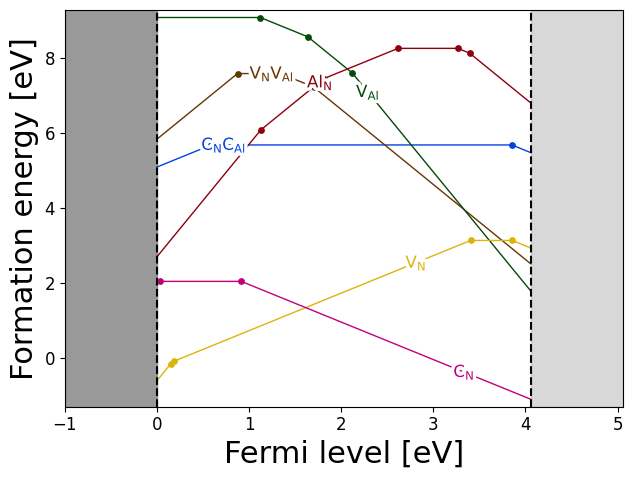

In [3]:
from pydefect.analyzer.defect_energy_plotter import DefectEnergyMplPlotter, DefectEnergySummary
import json

from VaspDefAnalysis.utils.path_save_output import SaveOutput
save = SaveOutput("outputs/supercell/defect_sumaries")

# Differential name between differen    t formation energies
name = "All"

# Load the defect energy summary from the JSON file
id_path = "outputs/supercell/defect_sumaries/new_defect_infomation_summary.json"

# Valence and condunction band from bulk result 
VBM = 5.9732
CBM = 10.0299

gap = CBM - VBM 
# Read the JSON data into a DefectEnergySummary object
with open(id_path, "r") as f:
    defect_energy_summary = DefectEnergySummary.from_dict(json.load(f))

# Create the plotter object
plotter = DefectEnergyMplPlotter(
    defect_energy_summary=defect_energy_summary,
    chem_pot_label="A",
    allow_shallow=True,
    with_corrections=True,
    add_thin_lines = False,
    #x_range = (-1.0, gap + 1.0),
    add_charges =False, 
    #label_line = None
)
plotter._title = None 
plotter.construct_plot()
#plotter.plt.legend()
plotter.plt.xlim(-1.0, gap + 1.0)
plotter.plt.axvline(x=0.0,color="black",linestyle = "--")
plotter.plt.axvline(x=gap,color="black",linestyle = "--")
plotter.plt.axvspan(xmin=gap,
                    xmax=gap +1.0,
                    color = "grey",
                    alpha = 0.3 ) 
plotter.plt.axvspan(xmin=0.0,
                    xmax=-1.0,
                    color = "grey",
                    alpha = 0.8) 
plotter.plt.xlabel(f"Fermi level [eV]",size=22)
plotter.plt.ylabel(f'Formation energy [eV]',size=22)
#plotter.plt.title("Rich-condition",fontdict={"family": "serif","color": "black","weight": "bold","size": 14})
plotter.plt.savefig(save.figure_path(figure_name="Al-rich-condition-"+name,dir_name="fomation_energies"),dpi = 400)
plotter.plt.show()

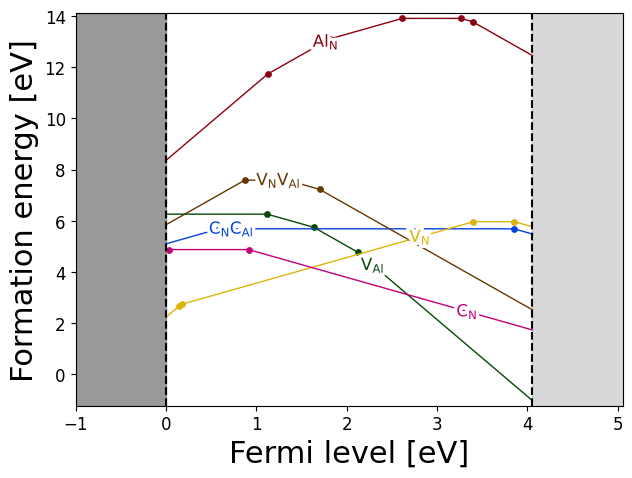

In [4]:
from pydefect.analyzer.defect_energy_plotter import DefectEnergyMplPlotter, DefectEnergySummary
import json

from VaspDefAnalysis.utils.path_save_output import SaveOutput

save = SaveOutput("outputs/supercell/defect_sumaries")


# Load the defect energy summary from the JSON file
id_path = "outputs/supercell/defect_sumaries/new_defect_infomation_summary.json"

# Valence and condunction band from bulk result 
VBM = 5.9732
CBM = 10.0299

gap = CBM - VBM 
# Read the JSON data into a DefectEnergySummary object
with open(id_path, "r") as f:
    defect_energy_summary = DefectEnergySummary.from_dict(json.load(f))

# Create the plotter object
plotter = DefectEnergyMplPlotter(
    defect_energy_summary=defect_energy_summary,
    chem_pot_label="B",
    allow_shallow=True,
    with_corrections=True,
    add_thin_lines = False,
    #x_range = (-1.0, gap + 1.0),
    add_charges = False

)
plotter._title = None 
plotter.construct_plot()
#plotter.plt.legend()
plotter.plt.xlim(-1.0, gap + 1.0)
plotter.plt.axvline(x=0.0,color="black",linestyle = "--")
plotter.plt.axvline(x=gap,color="black",linestyle = "--")

plotter.plt.axvspan(xmin=gap,
                    xmax=gap +1.0,
                    color = "grey",
                    alpha = 0.3) 
plotter.plt.axvspan(xmin=0.0,
                    xmax=-1.0,
                    color = "grey",
                    alpha = 0.8) 
plotter.plt.xlabel(f"Fermi level [eV]",size=22)
plotter.plt.ylabel(f'Formation energy [eV]',size=22)
#plotter.plt.title("Poor-condition",fontdict={"family": "serif","color": "black","weight": "bold","size": 14})
plotter.plt.savefig(save.figure_path(figure_name="N-rich-condition-"+name,dir_name="fomation_energies"),dpi = 400)
#plotter.plt.tight_layout()
plotter.plt.show()

# Print out the tansition energy level

In [21]:


import pandas as pd
import json

# Load the .json file
file_path = 'transition_levels.json'  # file path
with open(file_path, 'r') as f:
    data = json.load(f)

# Function to extract names, charges, energies, and fermi levels
def extract_transition_info(transition_data):
    name = transition_data['name']  
    charges = transition_data['charges']
    energies = transition_data['energies']
    fermi_levels = transition_data['fermi_levels']
    
    # List of tuples to associate charges with their corresponding energies and fermi levels
    transition_info = []
    for charge, energy, fermi in zip(charges, energies, fermi_levels):
        transition_info.append({
            'Name': name,
            'Charge': charge,
            'Energy (eV)': energy,
            'Fermi Level (eV)': fermi
        })
    return transition_info

transition_info_all = []

for transition in data['transition_levels']:
    transition_info = extract_transition_info(transition)
    transition_info_all.extend(transition_info)

df = pd.DataFrame(transition_info_all)

# Sort the data based on charges
df_sorted = df.sort_values(by='Name')

print("Transition Levels:")
print(df_sorted.to_string(index=False))



Transition Levels:
               Name   Charge  Energy (eV)  Fermi Level (eV)
${\rm C_{N}C_{Al}}$   [1, 0]     5.686808          0.588581
${\rm C_{N}C_{Al}}$  [0, -1]     5.686808          3.852550
${\rm V_{N}V_{Al}}$   [2, 0]     7.590526          0.873852
${\rm V_{N}V_{Al}}$  [0, -1]     7.231041          1.700716
${\rm V_{N}V_{Al}}$ [-1, -2]     7.590526          1.341231
               Al_N  [0, -1]    13.785367          3.393823
               Al_N   [1, 0]    13.913214          2.617286
               Al_N [-1, -2]    13.913214          3.265977
               Al_N   [3, 2]    13.107176          1.811248
               Al_N   [2, 1]    11.738586          1.126954
                C_N   [1, 0]     4.874653          0.914818
                C_N  [0, -1]     4.874653          0.032106
               V_Al  [0, -1]     4.777758          2.120912
               V_Al [-1, -2]     5.743966          1.637808
               V_Al [-2, -3]     6.259564          1.122210
                V_N  

# Print out the finite difect correction error 

In [11]:
import json
import pandas as pd

def load_defect_energy_summary(json_file):
    with open(json_file, 'r') as f:
        data = json.load(f)
    return data

# Extract information
def extract_defect_info(data):
    rows = []

    for defect_name, defect_info in data['defect_energies'].items():
        charges = defect_info['charges']
        defect_energies = defect_info['defect_energies']
        
        for i, energy in enumerate(defect_energies):
            row = {
                'Name': defect_name,
                'charge': charges[i],
                'Finite-Size Correction': energy['energy_corrections']['pc term'],
            }
            rows.append(row)

    # Create dataframe
    df = pd.DataFrame(rows)
    return df

json_file = 'outputs/supercell/defect_sumaries/parse_defect_infomation_summary.json'  # Path 
data = load_defect_energy_summary(json_file)
defect_df = extract_defect_info(data)

# Add the CBM 
#defect_df['cbm'] = data['cbm']

# Sort the data
defect_df.sort_values(by=['Name', 'charge'], inplace=True)

print(defect_df.to_string(index=False))

    Name  charge  Finite-Size Correction
    Al_N      -2                0.559168
    Al_N      -1                0.139792
    Al_N       0                0.000000
    Al_N       1                0.139792
    Al_N       2                0.559168
    Al_N       3                1.258128
C_N-C_Al      -1                0.139792
C_N-C_Al       0                0.000000
C_N-C_Al       1                0.139792
C_N-C_Al       2                0.559168
C_N-C_Al       3                1.258128
    V_Al      -3                1.258128
    V_Al      -2                0.559168
    V_Al      -1                0.139792
    V_Al       0                0.000000
    V_Al       1                0.139792
    V_Al       2                0.559168
     V_N      -3                1.258128
     V_N      -2                0.559168
     V_N      -1                0.139792
     V_N       0                0.000000
     V_N       1                0.139792
     V_N       2                0.559168
     V_N       3